In [10]:
import numpy as np # 수치연산, 수학 라이브러리
import os # 파일 관리
import matplotlib # 수학적인 연산, 그래프 plottting
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import SimpleITK as sitk # 의료영상용 라이브러리
import json
import csv
import pandas as pd
from sklearn import metrics as skmet
from skimage import morphology # 일반적인 영상처리
from skimage import measure
from skimage import exposure
from skimage.transform import rotate
from skimage import io as sio
from skimage import color as skc

test_data = 'C:/Users/user1/Desktop/Changhee/project/project_dataset/Normal/000000098656/123199__0175_22190232.dcm'# 파일 경로 수정
image = sitk.ReadImage(test_data)
image

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'itk::simple::Image *' at 0x0000023B6FB27B40> >

In [ ]:
img_arr = sitk.GetArrayFromImage(image)
print(img_arr.shape)
print(img_arr)

(1, 512, 512)
[[[-1024 -1022 -1007 ...  -971  -983 -1007]
  [-1000 -1018 -1019 ...  -990 -1019 -1024]
  [ -980  -974 -1016 ... -1016 -1024 -1024]
  ...
  [ -948  -981 -1024 ... -1024 -1024 -1024]
  [ -995  -998 -1024 ...  -995 -1019 -1024]
  [ -997  -967  -981 ...  -967  -990 -1008]]]


# Header Information #
Image Size =  (512, 512, 1)
Pixel Spacing =  (0.64453125, 0.64453125, 1.0)
Image Dimension =  3
Number of Pixel Components =  1
Minimum & Maximum pixel value(Min/Max) = -1024/1125
Image mean & std = -513.0961532592773, 481.6645535226902


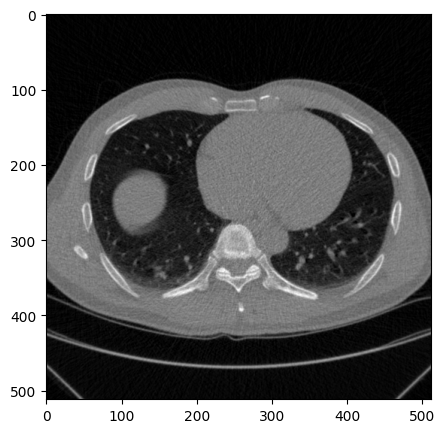

In [12]:
print('# Header Information #')
print('Image Size = ', image.GetSize())  # 이미지 크기
print('Pixel Spacing = ', image.GetSpacing())  # 픽셀 거리
print('Image Dimension = ', image.GetDimension())  # 원래 지축(높이)까지해서 3차원
print('Number of Pixel Components = ', image.GetNumberOfComponentsPerPixel())  # 흑백이라 1
print('Minimum & Maximum pixel value(Min/Max) = {}/{}'.format(np.min(img_arr), np.max(img_arr)))
print('Image mean & std = {}, {}'.format(np.mean(img_arr), np.std(img_arr)))

plt.figure(figsize=(5,5))
plt.imshow(img_arr[0], cmap='gray')

### DICOM - Normal

(1, 512, 512)
[[[-1024 -1022 -1007 ...  -971  -983 -1007]
  [-1000 -1018 -1019 ...  -990 -1019 -1024]
  [ -980  -974 -1016 ... -1016 -1024 -1024]
  ...
  [ -948  -981 -1024 ... -1024 -1024 -1024]
  [ -995  -998 -1024 ...  -995 -1019 -1024]
  [ -997  -967  -981 ...  -967  -990 -1008]]]
----------------------------------------------------
# Header Information #
Image Size =  (512, 512, 1)
Pixel Spacing =  (0.64453125, 0.64453125, 1.0)
Image Dimension =  3
Number of Pixel Components =  1
Minimum & Maximum pixel value(Min/Max) = -1024/1125
Image mean & std = -513.0961532592773, 481.6645535226902


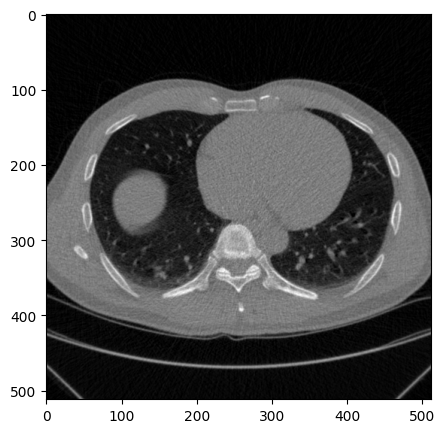

In [ ]:
import numpy as np # 수치연산, 수학 라이브러리
import os # 파일 관리
import matplotlib # 수학적인 연산, 그래프 plottting
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import SimpleITK as sitk # 의료영상용 라이브러리
import json
import csv
import pandas as pd
from sklearn import metrics as skmet
from skimage import morphology # 일반적인 영상처리
from skimage import measure
from skimage import exposure
from skimage.transform import rotate
from skimage import io as sio
from skimage import color as skc

test_data = 'C:/Users/user1/Desktop/Changhee/project/project_dataset/Normal/000000098656/123199__0175_22190232.dcm'# 파일 경로 수정
image = sitk.ReadImage(test_data)
img_arr = sitk.GetArrayFromImage(image)
print(img_arr.shape)
print(img_arr)

print("----------------------------------------------------")

print('# Header Information #')
print('Image Size = ', image.GetSize())  # 이미지 크기
print('Pixel Spacing = ', image.GetSpacing())  # 픽셀 거리
print('Image Dimension = ', image.GetDimension())  # 원래 지축(높이)까지해서 3차원
print('Number of Pixel Components = ', image.GetNumberOfComponentsPerPixel())  # 흑백이라 1
print('Minimum & Maximum pixel value(Min/Max) = {}/{}'.format(np.min(img_arr), np.max(img_arr)))
print('Image mean & std = {}, {}'.format(np.mean(img_arr), np.std(img_arr)))

plt.figure(figsize=(5,5))
plt.imshow(img_arr[0], cmap='gray')

### DICOM - PN

(1, 512, 512)
[[[-3024 -3024 -3024 ... -3024 -3024 -3024]
  [-3024 -3024 -3024 ... -3024 -3024 -3024]
  [-3024 -3024 -3024 ... -3024 -3024 -3024]
  ...
  [-3024 -3024 -3024 ... -3024 -3024 -3024]
  [-3024 -3024 -3024 ... -3024 -3024 -3024]
  [-3024 -3024 -3024 ... -3024 -3024 -3024]]]
----------------------------------------------------
# Header Information #
Image Size =  (512, 512, 1)
Pixel Spacing =  (0.595703, 0.595703, 1.0)
Image Dimension =  3
Number of Pixel Components =  1
Minimum & Maximum pixel value(Min/Max) = -3024/1441
Image mean & std = -1002.5710906982422, 1127.8986990317585


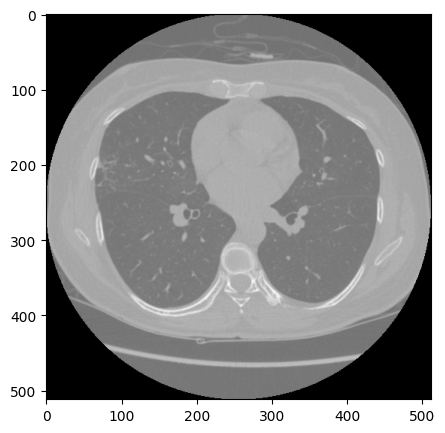

In [14]:
import numpy as np # 수치연산, 수학 라이브러리
import os # 파일 관리
import matplotlib # 수학적인 연산, 그래프 plottting
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import SimpleITK as sitk # 의료영상용 라이브러리
import json
import csv
import pandas as pd
from sklearn import metrics as skmet
from skimage import morphology # 일반적인 영상처리
from skimage import measure
from skimage import exposure
from skimage.transform import rotate
from skimage import io as sio
from skimage import color as skc

test_data = 'C:/Users/user1/Desktop/Changhee/project/project_dataset/PN/000000119865/130018_recon_0118_25133887.dcm'# 파일 경로 수정
image = sitk.ReadImage(test_data)
img_arr = sitk.GetArrayFromImage(image)
print(img_arr.shape)
print(img_arr)

print("----------------------------------------------------")

print('# Header Information #')
print('Image Size = ', image.GetSize())  # 이미지 크기
print('Pixel Spacing = ', image.GetSpacing())  # 픽셀 거리
print('Image Dimension = ', image.GetDimension())  # 원래 지축(높이)까지해서 3차원
print('Number of Pixel Components = ', image.GetNumberOfComponentsPerPixel())  # 흑백이라 1
print('Minimum & Maximum pixel value(Min/Max) = {}/{}'.format(np.min(img_arr), np.max(img_arr)))
print('Image mean & std = {}, {}'.format(np.mean(img_arr), np.std(img_arr)))

plt.figure(figsize=(5,5))
plt.imshow(img_arr[0], cmap='gray')

---

### NIfTI - Normal

NumPy 배열 형태(shape): (512, 512, 317)
NumPy 배열 dtype    : float64

----------------------------------------------------
# 헤더 정보 출력 #
볼륨 크기 (voxel)          = (317, 512, 512)
픽셀 간격 (mm)            = (1.0, 1.0, 1.0)
이미지 차원               = 3
픽셀 구성 요소 개수       = 1
이미지 원점 (Origin, mm)   = (0.0, 0.0, 0.0)
방향 코사인 (Direction)   = (-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
최소/최대 intensity       = -1024.0/2976.0
평균/표준편차 intensity    = -494.64, 494.13
----------------------------------------------------
vol.shape (Z, Y, X): (512, 512, 317)
GetSize()  (X, Y, Z): (317, 512, 512)


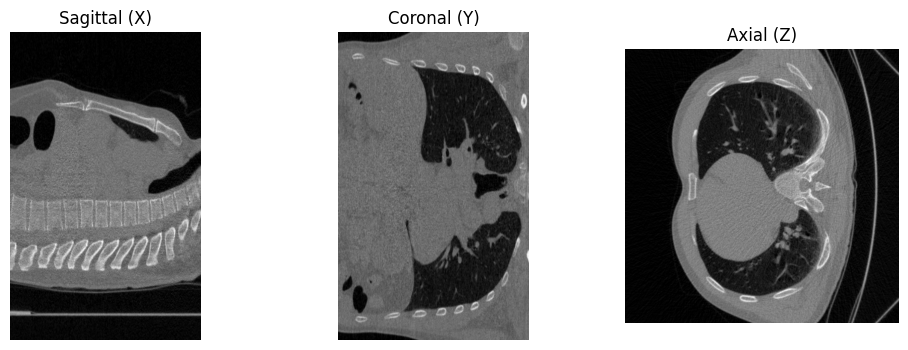

In [ ]:
import numpy as np           # 수치 연산 라이브러리
import os                    # 파일·디렉터리 관리
import matplotlib            # 그래프 라이브러리
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import SimpleITK as sitk     # 의료영상 처리 라이브러리
import json
import csv
import pandas as pd
from sklearn import metrics as skmet
from skimage import morphology, measure, exposure
from skimage.transform import rotate
from skimage import io as sio
from skimage import color as skc

# 1. NIfTI 볼륨 읽기
file_path = 'C:/Users/user1/Desktop/Changhee/project/project_data_nii/Normal/000000098656.nii.gz'
image     = sitk.ReadImage(file_path)
vol       = sitk.GetArrayFromImage(image)    # shape = (depth, height, width)

# 2. 배열 및 헤더 정보 출력
# SitkImage → NumPy 배열 (shape = (Z, Y, X))
img_arr = sitk.GetArrayFromImage(image)
print("NumPy 배열 형태(shape):", img_arr.shape)
print("NumPy 배열 dtype    :", img_arr.dtype)
print()

print("----------------------------------------------------")
print("# 헤더 정보 출력 #")
print("볼륨 크기 (voxel)          =", image.GetSize())               # (X, Y, Z)
print("픽셀 간격 (mm)            =", image.GetSpacing())            # (X, Y, Z)
print("이미지 차원               =", image.GetDimension())          # 일반적으로 3
print("픽셀 구성 요소 개수       =", image.GetNumberOfComponentsPerPixel())
print("이미지 원점 (Origin, mm)   =", image.GetOrigin())
print("방향 코사인 (Direction)   =", image.GetDirection())
print("최소/최대 intensity       = {}/{}".format(np.min(img_arr), np.max(img_arr)))
print("평균/표준편차 intensity    = {:.2f}, {:.2f}".format(np.mean(img_arr), np.std(img_arr)))
print("----------------------------------------------------")

# 3) 배열 순서 확인
print("vol.shape (Z, Y, X):", vol.shape)
print("GetSize()  (X, Y, Z):", image.GetSize())

# 4) 가운데 슬라이스 인덱스 계산
z_mid = vol.shape[0] // 2   # <- NumPy 배열 기준 Z축
y_mid = vol.shape[1] // 2   # coronal
x_mid = vol.shape[2] // 2   # sagittal

axial    = vol[z_mid    , :, :]
coronal  = vol[:, y_mid  , :]
sagittal = vol[:, :, x_mid]

fig, axes = plt.subplots(1,3, figsize=(12,4))
for ax, img, title in zip(axes, [axial, coronal, sagittal],
                          ['Sagittal (X)', 'Coronal (Y)', 'Axial (Z)']):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.show()


NumPy 배열 형태(shape): (512, 512, 268)
NumPy 배열 dtype    : float64

----------------------------------------------------
# 헤더 정보 출력 #
볼륨 크기 (voxel)          = (268, 512, 512)
픽셀 간격 (mm)            = (1.0, 1.0, 1.0)
이미지 차원               = 3
픽셀 구성 요소 개수       = 1
이미지 원점 (Origin, mm)   = (0.0, 0.0, 0.0)
방향 코사인 (Direction)   = (-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
최소/최대 intensity       = -1024.0/1864.0
평균/표준편차 intensity    = -562.75, 498.86
----------------------------------------------------
vol.shape (Z, Y, X): (512, 512, 268)
GetSize()  (X, Y, Z): (268, 512, 512)


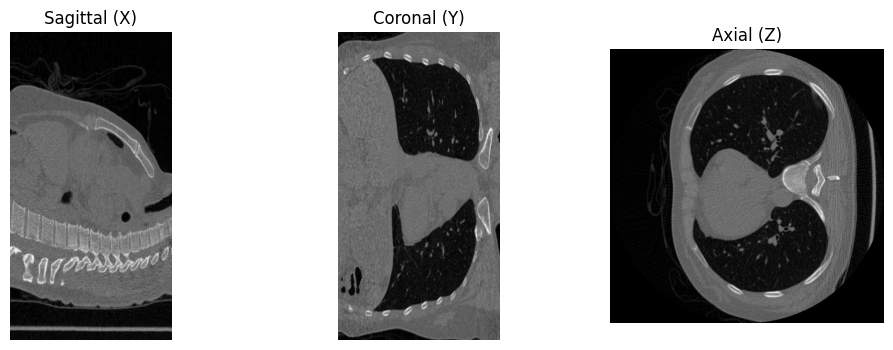

In [ ]:
import numpy as np           # 수치 연산 라이브러리
import os                    # 파일·디렉터리 관리
import matplotlib            # 그래프 라이브러리
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import SimpleITK as sitk     # 의료영상 처리 라이브러리
import json
import csv
import pandas as pd
from sklearn import metrics as skmet
from skimage import morphology, measure, exposure
from skimage.transform import rotate
from skimage import io as sio
from skimage import color as skc

# 1. NIfTI 볼륨 읽기
file_path = 'C:/Users/user1/Desktop/Changhee/project/project_data_nii/Normal/000000098783.nii.gz'
image     = sitk.ReadImage(file_path)
vol       = sitk.GetArrayFromImage(image)    # shape = (depth, height, width)

# 2. 배열 및 헤더 정보 출력
# SitkImage → NumPy 배열 (shape = (Z, Y, X))
img_arr = sitk.GetArrayFromImage(image)
print("NumPy 배열 형태(shape):", img_arr.shape)
print("NumPy 배열 dtype    :", img_arr.dtype)
print()

print("----------------------------------------------------")
print("# 헤더 정보 출력 #")
print("볼륨 크기 (voxel)          =", image.GetSize())               # (X, Y, Z)
print("픽셀 간격 (mm)            =", image.GetSpacing())            # (X, Y, Z)
print("이미지 차원               =", image.GetDimension())          # 일반적으로 3
print("픽셀 구성 요소 개수       =", image.GetNumberOfComponentsPerPixel())
print("이미지 원점 (Origin, mm)   =", image.GetOrigin())
print("방향 코사인 (Direction)   =", image.GetDirection())
print("최소/최대 intensity       = {}/{}".format(np.min(img_arr), np.max(img_arr)))
print("평균/표준편차 intensity    = {:.2f}, {:.2f}".format(np.mean(img_arr), np.std(img_arr)))
print("----------------------------------------------------")

# 3) 배열 순서 확인
print("vol.shape (Z, Y, X):", vol.shape)
print("GetSize()  (X, Y, Z):", image.GetSize())

# 4) 가운데 슬라이스 인덱스 계산
z_mid = vol.shape[0] // 2   # <- NumPy 배열 기준 Z축
y_mid = vol.shape[1] // 2   # coronal
x_mid = vol.shape[2] // 2   # sagittal

axial    = vol[z_mid    , :, :]
coronal  = vol[:, y_mid  , :]
sagittal = vol[:, :, x_mid]

fig, axes = plt.subplots(1,3, figsize=(12,4))
for ax, img, title in zip(axes, [axial, coronal, sagittal],
                          ['Sagittal (X)', 'Coronal (Y)', 'Axial (Z)']):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.show()


### PNG - Normal

(512, 512, 4)
[[[ 20  20  20 255]
  [150 150 150 255]
  [147 147 147 255]
  ...
  [149 149 149 255]
  [154 154 154 255]
  [ 24  24  24 255]]

 [[ 17  17  17 255]
  [145 145 145 255]
  [144 144 144 255]
  ...
  [141 141 141 255]
  [143 143 143 255]
  [ 14  14  14 255]]

 [[ 15  15  15 255]
  [142 142 142 255]
  [141 141 141 255]
  ...
  [136 136 136 255]
  [138 138 138 255]
  [  9   9   9 255]]

 ...

 [[ 19  19  19 255]
  [151 151 151 255]
  [147 147 147 255]
  ...
  [149 149 149 255]
  [149 149 149 255]
  [ 18  18  18 255]]

 [[ 22  22  22 255]
  [150 150 150 255]
  [144 144 144 255]
  ...
  [153 153 153 255]
  [154 154 154 255]
  [ 21  21  21 255]]

 [[ 23  23  23 255]
  [149 149 149 255]
  [146 146 146 255]
  ...
  [153 153 153 255]
  [160 160 160 255]
  [ 28  28  28 255]]]
----------------------------------------------------
# Header Information #
Image Size =  (512, 512)
Pixel Spacing =  (1.0, 1.0)
Image Dimension =  2
Number of Pixel Components =  4
Minimum & Maximum pixel value(

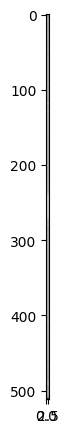

In [3]:
import numpy as np # 수치연산, 수학 라이브러리
import os # 파일 관리
import matplotlib # 수학적인 연산, 그래프 plottting
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import SimpleITK as sitk # 의료영상용 라이브러리
import json
import csv
import pandas as pd
from sklearn import metrics as skmet
from skimage import morphology # 일반적인 영상처리
from skimage import measure
from skimage import exposure
from skimage.transform import rotate
from skimage import io as sio
from skimage import color as skc

test_data = 'C:/Users/user1/Desktop/Changhee/project/CT_to_radon/temp_reconstruction.png'# 파일 경로 수정
image = sitk.ReadImage(test_data)
img_arr = sitk.GetArrayFromImage(image)
print(img_arr.shape)
print(img_arr)

print("----------------------------------------------------")

print('# Header Information #')
print('Image Size = ', image.GetSize())  # 이미지 크기
print('Pixel Spacing = ', image.GetSpacing())  # 픽셀 거리
print('Image Dimension = ', image.GetDimension())  # 원래 지축(높이)까지해서 3차원
print('Number of Pixel Components = ', image.GetNumberOfComponentsPerPixel())  # 흑백이라 1
print('Minimum & Maximum pixel value(Min/Max) = {}/{}'.format(np.min(img_arr), np.max(img_arr)))
print('Image mean & std = {}, {}'.format(np.mean(img_arr), np.std(img_arr)))

plt.figure(figsize=(5,5))
plt.imshow(img_arr[0], cmap='gray')